In [1]:
#pandas seaborn tensorflow(keras)임포트
#및 version 확인
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print(pd.__version__)
print(sns.__version__)
print(tf.__version__)

1.4.4
0.12.0
2.10.0


In [2]:
#mpg-dataset
dataset=sns.load_dataset('mpg')
dataset

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [3]:
#결측치 확인 및 제거
#필요없는 테이블 삭제
dataset.shape #398,9
#dataset.info()
dataset.isnull().sum()
dataset=dataset.dropna()
dataset.shape #392,9 결측치 6개 삭제

(392, 9)

In [6]:
#문자열 데이터 처리
#name(삭제),origin(범주형 원-핫 인코딩으로 변환)
#dataset.pop('name')
#origin=dataset.pop('origin')
#dataset['usa']=(origin=='usa')*1.0
#dataset['europe']=(origin=='europe')*1.0
#dataset['japan']=(origin=='japan')*1.0
dataset

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,usa,europe,japan
0,18.0,8,307.0,130.0,3504,12.0,70,1.0,0.0,0.0
1,15.0,8,350.0,165.0,3693,11.5,70,1.0,0.0,0.0
2,18.0,8,318.0,150.0,3436,11.0,70,1.0,0.0,0.0
3,16.0,8,304.0,150.0,3433,12.0,70,1.0,0.0,0.0
4,17.0,8,302.0,140.0,3449,10.5,70,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1.0,0.0,0.0
394,44.0,4,97.0,52.0,2130,24.6,82,0.0,1.0,0.0
395,32.0,4,135.0,84.0,2295,11.6,82,1.0,0.0,0.0
396,28.0,4,120.0,79.0,2625,18.6,82,1.0,0.0,0.0


In [8]:
# 학습 - 9 - train_dataset 
# 평가 - 1 - test_dataset
train_dataset=dataset.sample(frac=0.9,random_state=40)
test_dataset=dataset.drop(train_dataset.index)


In [9]:
train_dataset.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,usa,europe,japan
18,27.0,4,97.0,88.0,2130,14.5,70,0.0,0.0,1.0
368,27.0,4,112.0,88.0,2640,18.6,82,1.0,0.0,0.0
153,18.0,6,250.0,105.0,3459,16.0,75,1.0,0.0,0.0
275,17.0,6,163.0,125.0,3140,13.6,78,0.0,1.0,0.0
179,22.0,4,121.0,98.0,2945,14.5,75,0.0,1.0,0.0
296,27.4,4,121.0,80.0,2670,15.0,79,1.0,0.0,0.0
52,30.0,4,88.0,76.0,2065,14.5,71,0.0,1.0,0.0
3,16.0,8,304.0,150.0,3433,12.0,70,1.0,0.0,0.0
287,16.5,8,351.0,138.0,3955,13.2,79,1.0,0.0,0.0
101,23.0,6,198.0,95.0,2904,16.0,73,1.0,0.0,0.0


In [10]:
test_dataset.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,usa,europe,japan
7,14.0,8,440.0,215.0,4312,8.5,70,1.0,0.0,0.0
8,14.0,8,455.0,225.0,4425,10.0,70,1.0,0.0,0.0
19,26.0,4,97.0,46.0,1835,20.5,70,0.0,1.0,0.0
22,25.0,4,104.0,95.0,2375,17.5,70,0.0,1.0,0.0
30,28.0,4,140.0,90.0,2264,15.5,71,1.0,0.0,0.0
56,26.0,4,91.0,70.0,1955,20.5,71,1.0,0.0,0.0
61,21.0,4,122.0,86.0,2226,16.5,72,1.0,0.0,0.0
74,13.0,8,302.0,140.0,4294,16.0,72,1.0,0.0,0.0
92,13.0,8,351.0,158.0,4363,13.0,73,1.0,0.0,0.0
105,13.0,8,360.0,170.0,4654,13.0,73,1.0,0.0,0.0


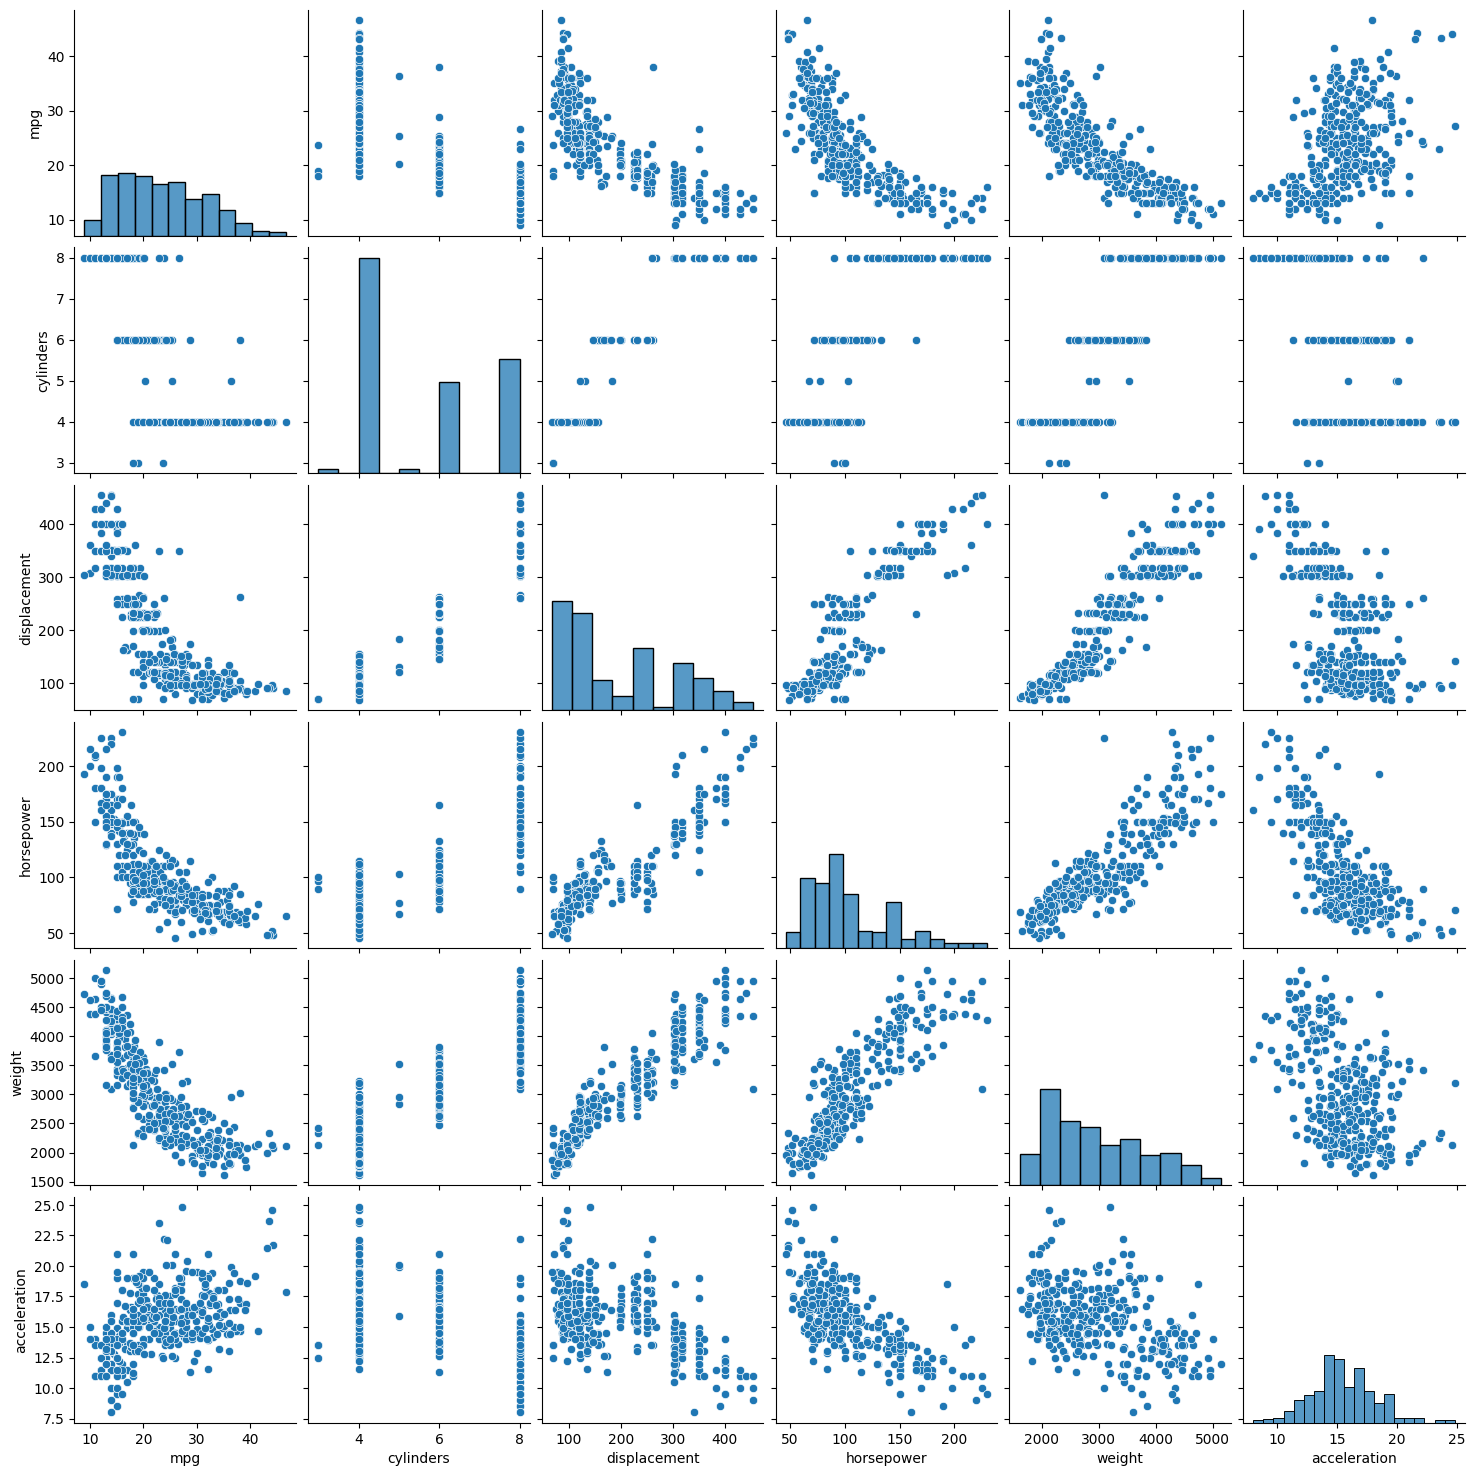

In [11]:
#플롯을 통한 데이터 시각화
#sns.pairplot(train_dataset)
#mpg,dispalcement,horsepower,weight,acceleration,cylinder
sns.pairplot(train_dataset[['mpg','cylinders','displacement','horsepower','weight','acceleration']])

In [12]:
#기술 통계
train_stats=train_dataset.describe()
train_stats.pop('mpg')
train_stats
#행열 변경
#train_stats=train_stats.transpose()

,cylinders,displacement,horsepower,weight,acceleration,model_year,usa,europe,japan
count,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000
mean,5.490085,195.117564,104.512748,2974.790368,15.480170,75.966006,0.626062,0.172805,0.201133
std,1.707450,104.278751,38.025641,842.868759,2.675786,3.687198,0.484534,0.378615,0.401416
min,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,0.000000,0.000000,0.000000
25%,4.000000,105.000000,76.000000,2230.000000,13.900000,73.000000,0.000000,0.000000,0.000000
50%,4.000000,151.000000,94.000000,2807.000000,15.500000,76.000000,1.000000,0.000000,0.000000
75%,8.000000,302.000000,125.000000,3574.000000,17.000000,79.000000,1.000000,0.000000,0.000000
max,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,1.000000,1.000000,1.000000


In [13]:
#레이블 생성 및 분리
train_lables=train_dataset.pop('mpg')
test_lables=test_dataset.pop('mpg')

In [14]:
#데이터 정규화()
#배열의 변경이 필요함

def norm(x):
    return (x-train_stats['mean'])/train_stats['std']
normed_train_data=norm(train_dataset)
normed_test_data=norm(test_dataset)


In [17]:
normed_train_data.head(10)

,cylinders,displacement,horsepower,weight,acceleration,model_year,usa,europe,japan
18,-0.872696,-0.940916,-0.434253,-1.002280,-0.366311,-1.618032,-1.292091,-0.456412,1.990120
368,-0.872696,-0.797071,-0.434253,-0.397203,1.165949,1.636471,0.771747,-0.456412,-0.501059
153,0.298641,0.526305,0.012814,0.574478,0.194272,-0.261989,0.771747,-0.456412,-0.501059
275,0.298641,-0.307997,0.538775,0.196009,-0.702661,0.551637,-1.292091,2.184794,-0.501059
179,-0.872696,-0.710764,-0.171273,-0.035344,-0.366311,-0.261989,-1.292091,2.184794,-0.501059
296,-0.872696,-0.710764,-0.644637,-0.361611,-0.179450,0.822845,0.771747,-0.456412,-0.501059
52,-0.872696,-1.027223,-0.749830,-1.079397,-0.366311,-1.346824,-1.292091,2.184794,-0.501059
3,1.469979,1.044148,1.196226,0.543631,-1.300616,-1.618032,0.771747,-0.456412,-0.501059
287,1.469979,1.494863,0.880649,1.162945,-0.852149,0.822845,0.771747,-0.456412,-0.501059
101,0.298641,0.027642,-0.250167,-0.083987,0.194272,-0.804406,0.771747,-0.456412,-0.501059


In [18]:
normed_test_data.head(10)

,cylinders,displacement,horsepower,weight,acceleration,model_year,usa,europe,japan
7,1.469979,2.348345,2.905599,1.586498,-2.608642,-1.618032,0.771747,-0.456412,-0.501059
8,1.469979,2.492190,3.168579,1.720564,-2.048060,-1.618032,0.771747,-0.456412,-0.501059
19,-0.872696,-0.940916,-1.538771,-1.352275,1.876020,-1.618032,-1.292091,2.184794,-0.501059
22,-0.872696,-0.873788,-0.250167,-0.711606,0.754855,-1.618032,-1.292091,2.184794,-0.501059
30,-0.872696,-0.528560,-0.381657,-0.843299,0.007411,-1.346824,0.771747,-0.456412,-0.501059
56,-0.872696,-0.998454,-0.907618,-1.209904,1.876020,-1.346824,0.771747,-0.456412,-0.501059
61,-0.872696,-0.701174,-0.486849,-0.888383,0.381133,-1.075615,0.771747,-0.456412,-0.501059
74,1.469979,1.024969,0.933245,1.565142,0.194272,-1.075615,0.771747,-0.456412,-0.501059
92,1.469979,1.494863,1.406610,1.647006,-0.926894,-0.804406,0.771747,-0.456412,-0.501059
105,1.469979,1.581170,1.722187,1.992255,-0.926894,-0.804406,0.771747,-0.456412,-0.501059


In [21]:
#모델 만들기
#len(train_dataset.keys())=>9
def build_model():
    model=keras.Sequential([
        layers.Dense(64,input_shape=[len(train_dataset.keys())],activation='relu'),
        layers.Dense(64,activation='relu'),        
        layers.Dense(1)        
    ])
    optimizer=tf.keras.optimizers.RMSprop(0.001)
    model.compile(loss='mse',optimizer=optimizer,metrics=['mae','mse'])
    return model

In [22]:
model=build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                640       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


In [27]:
#모델 훈련 및 에포크
class PointDot(keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs):
        if epoch%100==0:
            print('')
        print('.',end='')
EPOCH=1000
model=build_model()
history=model.fit(
    normed_train_data,train_lables,epochs=EPOCH,validation_split=0.2,verbose=0,callbacks=[PointDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [29]:
#check
hist=pd.DataFrame(history.history)
hist['epoch']=history.epoch
hist.head(10)
hist.tail(10)

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
990,1.985726,0.916531,1.985726,7.988347,1.967282,7.988347,990
991,2.007442,0.922069,2.007442,7.680769,1.904142,7.680769,991
992,2.057613,0.930530,2.057613,7.823741,1.926486,7.823741,992
993,2.023373,0.917260,2.023373,8.252540,1.997853,8.252540,993
994,2.017021,0.901666,2.017021,8.191009,2.002189,8.191008,994
995,2.009714,0.919658,2.009714,8.110910,2.015144,8.110910,995
996,2.003859,0.938837,2.003859,9.345380,2.170903,9.345380,996
997,2.039774,0.942003,2.039774,7.899264,1.879150,7.899264,997
998,1.938360,0.895049,1.938360,9.567726,2.179152,9.567726,998
999,2.068402,0.951246,2.068402,8.227193,1.978337,8.227193,999


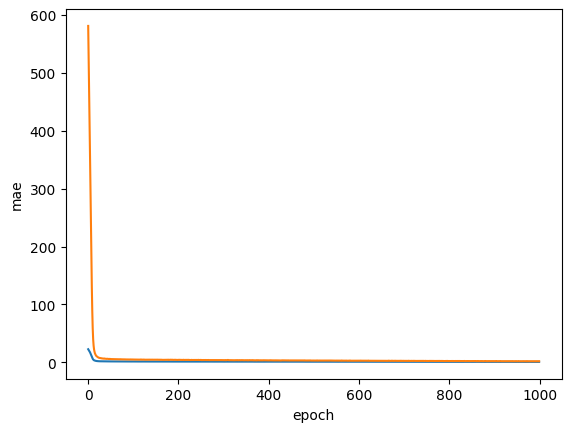

In [31]:
#데이터 시각화
def sns_hist(history):
    hist=pd.DataFrame(history.history)
    hist['epoch']=history.epoch
    sns.lineplot(data=hist,x='epoch',y='mae')
    sns.lineplot(data=hist,x='epoch',y='mse')
sns_hist(history)


....................................................................................................
....................................................................................................
....................................................................................................
...................................................................

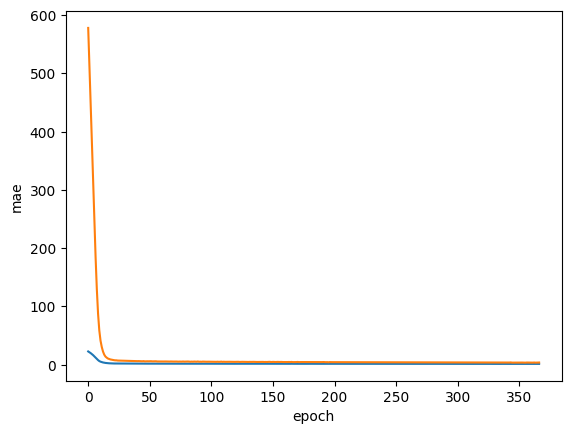

In [42]:
#model.fit을 수정해서 검증 점수가 향상되지않으면 자동으로 훈련을 멈추도록
model=build_model()
early_stop=keras.callbacks.EarlyStopping(monitor='val_loss',patience=50)
history=model.fit(
    normed_train_data,train_lables,epochs=EPOCH,validation_split=0.2,verbose=0,callbacks=[PointDot(),early_stop]
)
sns_hist(history)

In [43]:
#성능 평가
loss,mae,mse=model.evaluate(normed_test_data,test_lables,verbose=2)
print("테스트 세트의 평균 절대 오차: {:.2f} MPG".format(mae))

2/2 - 0s - loss: 10.5992 - mae: 2.1335 - mse: 10.5992 - 15ms/epoch - 7ms/step
테스트 세트의 평균 절대 오차: 2.13 MPG


2/2 [==============================] - 0s 998us/step


<AxesSubplot:xlabel='mpg'>

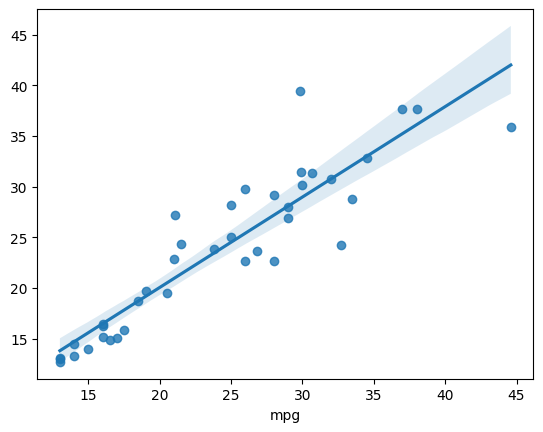

In [44]:
#시각화 및 평가
test_predictions=model.predict(normed_test_data).flatten()
sns.regplot(x=test_lables,y=test_predictions)

<AxesSubplot:xlabel='mpg'>

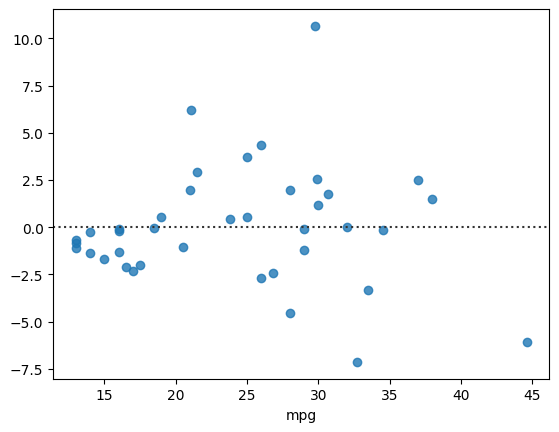

In [45]:
sns.residplot(x=test_lables,y=test_predictions)

In [40]:
#오차 분포
error=test_predictions-test_lables
error.head(10)

7      0.562087
8     -0.873928
19     4.287872
22    -3.270012
30    -5.042599
56     0.138113
61     2.341629
74     0.212790
92     0.400823
105   -0.168175
Name: mpg, dtype: float64

<AxesSubplot:>

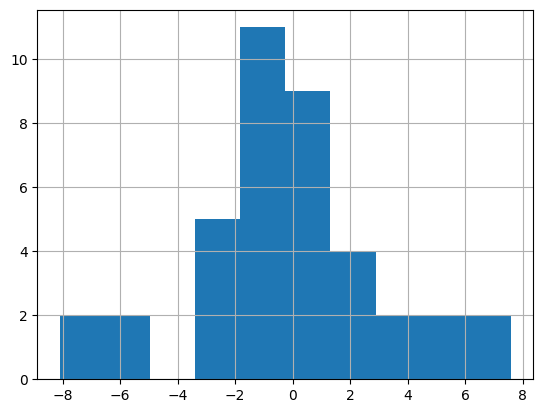

In [41]:
error.hist()